In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df = pd.read_csv('classificationData.csv')
df.head()

,Ia,Ib,Ic,Va,Vb,Vc,fault
0,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,1
1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,1
2,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,1
3,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,1
4,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,1


In [16]:
X = df[['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc']]
Y = df['fault']

In [ ]:
##PCA3 DR
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

X_pca = pca.fit_transform(X)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

for target_value in range(6):  # Assuming 6 classes
    ax.scatter(X_pca[Y == target_value, 0], 
               X_pca[Y == target_value, 1], 
               X_pca[Y == target_value, 2],
               
               label='fault ' + str(target_value))
    
X_pca_df = pd.DataFrame(X_pca, columns=['pc1', 'pc2', 'pc3'])
X_pca_df['fault'] = Y.values

X_pca_df.to_csv('/Users/digvijay/Developer/MasterThesis/master-thesis-quantumkernelclassification/Code/DR_data/pca3.csv')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('PCA of Your Dataset')
ax.legend(title='Fault')
plt.show()

: 

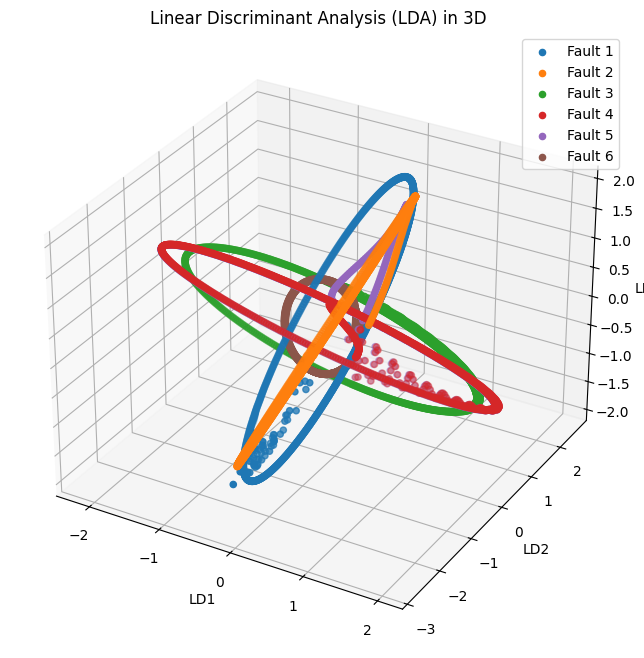

In [20]:
##FDA / LDA DR 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=3)
X_lda = lda.fit_transform(X, Y)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

lda_df = pd.DataFrame(X_lda, columns=['LD1', 'LD2', 'LD3'])
lda_df['fault'] = Y.values


lda_df.to_csv('/Users/digvijay/Developer/MasterThesis/master-thesis-quantumkernelclassification/Code/DR_data/lda3.csv')


# Scatter plot of the LDA-transformed data
for fault_label in lda_df['fault'].unique():
    ax.scatter(lda_df.loc[lda_df['fault'] == fault_label, 'LD1'], 
               lda_df.loc[lda_df['fault'] == fault_label, 'LD2'], 
               lda_df.loc[lda_df['fault'] == fault_label, 'LD3'], 
               label=f'Fault {fault_label}')

ax.set_xlabel('LD1')
ax.set_ylabel('LD2')
ax.set_zlabel('LD3')
ax.set_title('Fishers Discriminant Analysis (LDA) in 3D')
ax.legend()
plt.show()

In [ ]:
##Autoencoders
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

class Autoencoder(nn.Module):
    def __init__(self, input_size, encoding_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(True),
            nn.Linear(128, 64),
            nn.ReLU(True),
            nn.Linear(64, encoding_dim)
             nn.ReLU(True),
            nn.Linear(64, encoding_dim)
             nn.ReLU(True),
            nn.Linear(64, encoding_dim)
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 64),
            nn.ReLU(True),
            nn.Linear(64, 128),
            nn.ReLU(True),
             nn.Linear(64, 128),
            nn.ReLU(True),
             nn.Linear(64, 128),
            nn.ReLU(True),
            nn.Linear(128, input_size),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
    
 #X = X.to_numpy()
X = (X - np.mean(X)) / np.std(X)
X_tensor = torch.tensor(X, dtype=torch.float32)
input_size = X.shape[1]
encoding_dim = 3 
model = Autoencoder(input_size, encoding_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


num_epochs = 10000
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_tensor)
    loss = criterion(outputs, X_tensor)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Encode the data
model.eval()
with torch.no_grad():
    encoded_data = model.encoder(X_tensor).numpy()
    
encoded_df = pd.DataFrame(encoded_data, columns=['ed1', 'ed2', 'ed3'])
encoded_df['target'] = Y.values
encoded_df.to_csv('/Users/digvijay/Developer/MasterThesis/master-thesis-quantumkernelclassification/Code/DR_data/encoded_data.csv', index=False)

: 

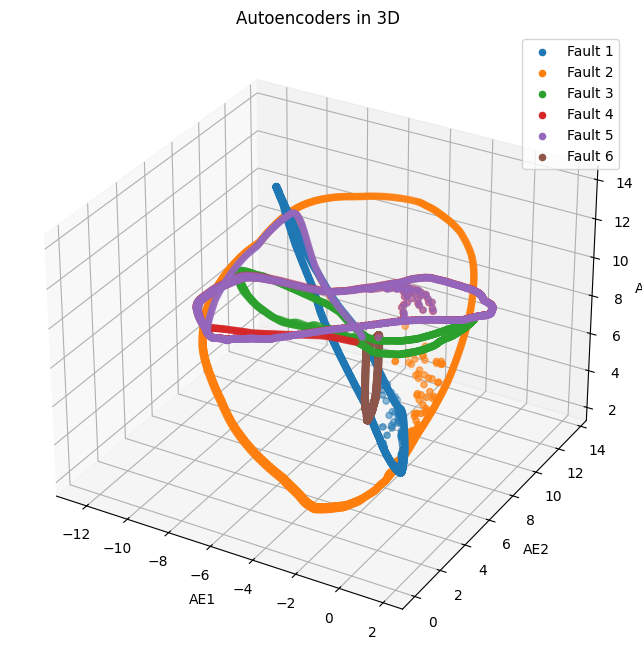

In [32]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for fault_label in encoded_df['target'].unique():
    ax.scatter(encoded_df.loc[encoded_df['target'] == fault_label, 'ed1'], 
               encoded_df.loc[encoded_df['target'] == fault_label, 'ed2'], 
               encoded_df.loc[encoded_df['target'] == fault_label, 'ed3'], 
               label=f'Fault {fault_label}')

ax.set_xlabel('AE1')
ax.set_ylabel('AE2')
ax.set_zlabel('AE3')
ax.set_title('Autoencoders in 3D')
ax.legend()
plt.show()